## Lab 6: Exploring Own Data Sets - FULL LAB

Lillian Ellis

Created October 30, 2018

**Abstract:**

In this lab, I worked with a dataset from a survey pulled from Nate Silver's article on Five Thirty Eight surrounding eating steak. This dataset is from May 7th and 8th of 2018 and it is information from a survey sent out to 550 people with questions surrounding risks they take in everyday life, and if and how they eat steak. Throughout my lab, I worked to figure out trends for those who eat or choose not to eat steak. 
Overarching Questions:
- Are smokers more likely to eat stake? What about males? Females? 
- Overall, do people who take more risks eat stake?



Link to data set on GitHub: https://github.com/fivethirtyeight/data/tree/master/steak-survey

Link to FiveThirtyEight article: https://fivethirtyeight.com/features/how-americans-like-their-steak/ 

Link to download dataset: https://data.fivethirtyeight.com

How I chose this data: 
- At first, I was really interested in the polling dataset from FiveThirtyEight, but I decided that it did not pose a lot of interesting questions around possible trends or correlations of the dataset for the upcoming elections.
- I have learned that it can be hard to find a dataset that is both interesting in quality, but also clean and easy to manage. The data set I have chosen I think is super interesting, and it is pretty clean. 
- Overall, my personal understanding surrounding what makes a good data set has shifted more from how pretty the data set looks or how serious the topic of the data ask lots of questions that your data can help you answer. 

**Data Set Preparation:**

In [42]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns #(sam seaborn!!)
import statsmodels.api as sm
import statsmodels.formula.api as smf
#Important - upgrade seaborn to 9.0
#these imports are useful to purpose
#general purpose packages


#makes the graphs visible in this notebook 
%matplotlib inline

In [43]:
#importing stake survey data set
#one line to open and read a csv filed into a data frame data structure
steak = pd.read_csv('steak-risk-survey.csv')

#print the first few lines of the data frame, default is 5 lines
steak.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England


A great way to take a clean first look at my data is printing its head, info and describe methods. These display overarching information about my dataset that will be useful throughout the remainder of my lab!

In [44]:
steak.info()
steak.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
RespondentID                                                                                                                                                                                                                                                                         550 non-null float64
Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?    547 non-null object
Do you ever smoke cigarettes?                                                                                                                                                                                                                                                        538 non-null object
Do 

,RespondentID
count,5.500000e+02
mean,3.234845e+09
std,1.265754e+05
min,3.234760e+09
25%,3.234800e+09
50%,3.234835e+09
75%,3.234875e+09
max,3.237566e+09


**Dataset Information:**

- My data set has 552 Rows and 15 columns
- My dataset is pulled from FiveThirtyEight, and it is based off of a survey conducted by Nate Silver and his team. On May 7th and 8th of this year, 550 people filled out this survey. 
- A lot of my data is binary, as my data set covers questions with two answers. These questions cover topics surrounding skydiving, gambling, smoking, and eating steak (a lot of Yes or No questions)
- My data is also filled with categorical data, as the survey prompts for a gender identification of the user, a selection of a range of their household income, and how they like their steak cooked. 


**Data Cleaning:**

On Missing Data: 
- I do have some missing data, as some survey-takers answered some questions and not others
- I plan to use the data they have provided through their responses to the survey
- Specifically, some survey-responders answered some information but not others. I am planning on discrediting all of the information without answers about whether they eat steak or not. However, this decision may change depending on what I end up analyzing. 


Variables I plan to use:
- Because most of my data is binary, I will use a lot of it through overlapping different variables. 
- Including: eating steak, and risk factors: lottery question, skydiving, smoking, cheating, gambling, etc. 
- I want to combine, throughout graphs and possibly new variables, counts surrounding lottery question answers, skydiving, smoking, cheating, gambling, gender identification, etc. 
    - Hopefully I can figure out a way to do this through creating a new column that combines other columns of binary data 
- This is so I can analyze the risk factors all together against the variable of steak. From there, I can compare factors such as gender, income, etc. 


Analysis I hope to do:
- I am planning to analyze the possible correlation between taking certain types of risks and eating steak I plan to do this by overlapping the data I have involving risks
- I also plan to analyze a possible correlation from eating steak to things like gender, income, education, age, and location. Maybe I’ll find other information as I go not even about steak! 


Data Cleaning Tasks:
The first thing I noticed was when I read in the header was that there was a seperate column for the word "Response". I decided to take that out, becasue it provides no information I need and does not represent a legit response. It is another title. I also changes Yes: 1 and No: 0. I made this change so it was easier to look and read in the numbers. It also converts these strings to numerical values! This should be helpful for my analysis to come. 

(Note: originally, I wanted to replace NaN with x to make the data nicer for me to look at, but I quickly realized that this would have been a completley unnessecary clean and it acctually impared me from running a graph because my code would error as non-numerical values. I quickly made this fix after realizing that replacing x was not a good idea, and decided to keep NaN as a value because it is a super helpful one!- this original code is below)

In [45]:
#Deleted cleaning:
#filling null values with x through the .fillna method 
#steak = steak.fillna('x')
#print head with "head" method to display replaced null values 
#steak.head()

In [46]:
#Next, replacing Yes and NO with number values to clear up data set 
#permanently changing data frame by redefining it 
steak = steak.replace(['Yes', 'No'], [1,0])
#print head with "head" method to display this change
steak.head()


,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,0,1,0,0,0,0,1,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,0,1,1,0,1,1,1,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,1,1,1,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England


In [47]:
#the drop method drops index 0 as the response info is not needed
steak.drop(steak.index[[0]], inplace = True)
steak.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,0,1,0,0,0,0,1,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,0,1,1,0,1,1,1,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,1,1,1,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
5,3.234959e+09,Lottery B,0,1,0,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic


Finally, I decided to additionally rename each column with clearer, more consise titles. 

In [48]:
#Finally, I am renaming column #2
#With the rename method, I called the header name and renamed it

#Inplace directly replaces it in your list 
#This makes a permanent change, a view (not just editing the view)

steak.rename(columns = {
    list(steak)[0] : 'ID',
    list(steak)[1] : 'lottery',
    list(steak)[2]: 'smoke',
    list(steak)[3] : 'alcohol',
    list(steak)[4] : 'gamble',
    list(steak)[5] : 'skydiving',
    list(steak)[6] : 'speeding',
    list(steak)[7] : 'cheated',
    list(steak)[8] : 'steak',
    list(steak)[9] : 'prepared',
    list(steak)[10] : 'gender',
    list(steak)[11] : 'age',
    list(steak)[12] : 'income',
    list(steak)[13] : 'education',
    list(steak)[14] : 'location',
    },
          inplace = True)

steak.head()

,ID,lottery,smoke,alcohol,gamble,skydiving,speeding,cheated,steak,prepared,gender,age,income,education,location
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,0,1,0,0,0,0,1,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,0,1,1,0,1,1,1,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,1,1,1,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
5,3.234959e+09,Lottery B,0,1,0,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic


**Data Modeling**

The first approach to my data modeling section of this lab was to line up certain variables with the answer to the steak prompt. (So seeing if there was a correlation between steak and risks such as alcohol, gamble, skydiving, speeding, etc.)

At first, I just printed some simple bar graphs which displayed a brief insight into correlation between certain risks and variables and eating steak.

First, relationship between steak and alcohol through a bar plot

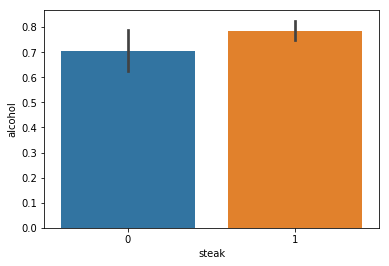

In [49]:
#plot the data using relplot(relational plot)

#display a graph plotting smoking v eating steak
sns.barplot(x="steak", y="alcohol", data = steak)

Then, I began to combine two risk factors and compare those with eating steak (the bar graph below is alchohol, gambling compared with eating steak)

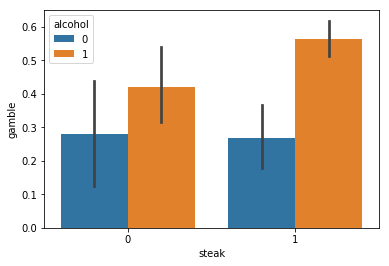

In [50]:
#steak and gambling with alchohol as well 
sns.barplot(x="steak", y="gamble", hue = "alcohol", data = steak)

Steak, Speeding, Skydiving

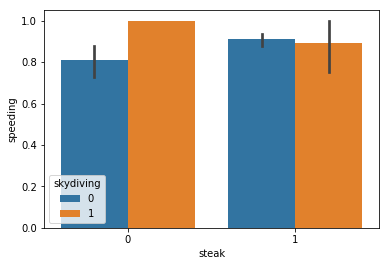

In [51]:
#steak and speeding and skydiving 
sns.barplot(x="steak", y="speeding", hue = "skydiving", data = steak)

Steak, Smoking, and Cheating

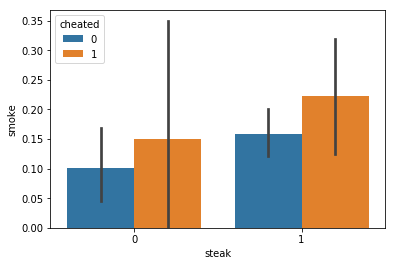

In [52]:
#steak, smoking, and cheating on spouse
sns.barplot(x="steak", y="smoke", hue = "cheated", data = steak)

Steak, education, and gender 

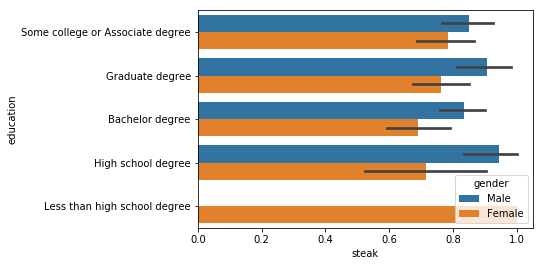

In [53]:
#steak, education, gender
sns.barplot(x="steak", y="education", hue = "gender", data = steak)

Steak and income

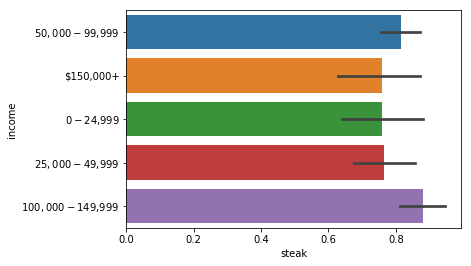

In [54]:
#income and steak 
sns.barplot(x="steak", y="income", data = steak)

Steak and location 

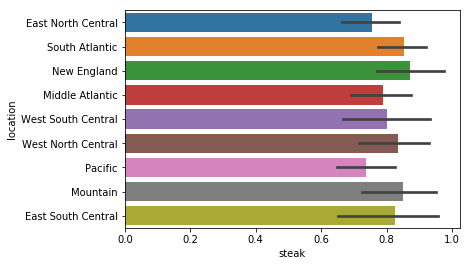

In [55]:
#Where do people eat the most steak out of the 550 people who filled out the survey? 

sns.barplot(x="steak", y="location", data = steak)

**Data Modeling Part 2: Combining Binary Data**

The graphs which I modeled above were extremley helpful for pointing out alot of pretty basic correlations. I was able to understand relationships between some direct risk factors and even overlap them by declaring a hue. However initially helpful this kind of data searching was, I wanted to overlap my binary data in order to see even more. Maybe smoking will have no correlation to eating steak, but maybe smoking and skydiving will! I really wanted to overlap these binary columns into something else to provide even more insight into what I was exploring here. 

Additionally, I began to think about I could display my data beyond a bar graph. Maybe a heat map would be helpful! 
In the below section, I begin to explore these ideas to get even more out of the binary data I began with. 

In [56]:
#creating smoking and gambling
steak["smoke and gamble"] = steak["smoke"] + steak["gamble"]
steak.head()


,ID,lottery,smoke,alcohol,gamble,skydiving,speeding,cheated,steak,prepared,gender,age,income,education,location,smoke and gamble
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,0,1,0,0,0,0,1,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central,0
3,3.234973e+09,Lottery A,0,1,1,0,1,1,1,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic,1
4,3.234972e+09,Lottery B,1,1,1,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England,2
5,3.234959e+09,Lottery B,0,1,0,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic,0


In [63]:
#still have to differntiate smoking and no gamble and no smoke and gamble (these now are both under the number 1)
#but, my code above did read in 0 as niether and 2 as both! 
#My next step needs to be differentiating these two things 

#No smoke no gamble = 1
#yes somke no gamble = 2
#no smoke yes gamble = 3
#yes smoke yes gamble = 4

for i in steak:
    
    if (steak.index[0], steak.columns[2]) == 0 and (steak.index[0], steak.columns[4]) == 0:
        steak["smoke and gamble"] == 1
    elif (steak.index[0], steak.columns[2]) == 1 and (steak.index[0], steak.columns[4]) == 0:
        steak["smoke and gamble"] == 2
    
    elif (steak.index[0], steak.columns[2]) == 0 and (steak.index[0], steak.columns[4]) == 1:
        steak["smoke and gamble"] == 3

    else:
        steak["smoke and gamble"] == 4
    
steak.head()


,ID,lottery,smoke,alcohol,gamble,skydiving,speeding,cheated,steak,prepared,gender,age,income,education,location,smoke and gamble
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,0,1,0,0,0,0,1,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central,0
3,3.234973e+09,Lottery A,0,1,1,0,1,1,1,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic,1
4,3.234972e+09,Lottery B,1,1,1,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England,2
5,3.234959e+09,Lottery B,0,1,0,0,1,1,1,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic,0


Now that I have combined the two risk factors of smoking and gambling in a column, I can produce graphs with those overlapping risk factors!!

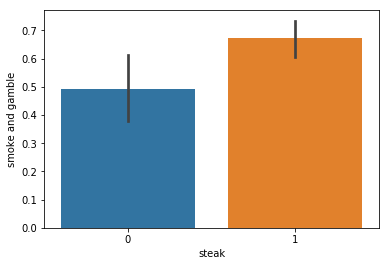

In [67]:
sns.barplot(x="steak", y="smoke and gamble", data = steak)

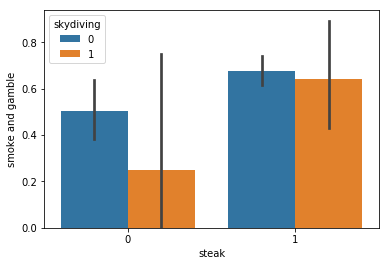

In [68]:
sns.barplot(x="steak", y="smoke and gamble", hue = "skydiving", data = steak)

**Used Sites:**

https://seaborn.pydata.org/generated/seaborn.barplot.html 

https://seaborn.pydata.org/tutorial/distributions.html

https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python

Ms. Sconyers helped me alot when understanding that replacing NaN with x was both inefficient and was the source of my errors. She also aided me in understanding how to combine multiple binary data columns together into one column to work at overlaping my data and try to understand even more about my dataset!